## Figuras

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def TCP(t, u):
    h = []
    for idx in range(len(u)-1):
        h.append(t[idx+1] - t[idx])

    #Obteniendo matriz A.
    A = np.zeros((len(u)-2, len(u)-2))
    A[0,0] = (-1/3)*(h[0]+h[len(u)-2])
    A[0,1] = (-1/6) * h[0]
    A[1,0] = h[0]
    A[1,1] = 2*(h[0] + h[1])
    for n in range(2, len(u)-2):
        A[n, n] = 2 * (h[n-2] + h[n-1])
        A[n, n-1] = h[n-1]
        A[n-1, n] = h[n-1]
        if n == (len(u)-2):
            A[0, n] = (-1/6) * h[n]
            A[n, 0] = h[n]

    #Obteniendo vector B.
    B = [(-(u[1] - u[0]) / h[0]) + ((u[len(u)-1] - u[len(u)-2]) / h[len(u)-2])]
    for i in range(1, len(u)-2):
        B.append(6 * (((u[i+1] - u[i]) / h[i]) - ((u[i] - u[i-1]) / h[i-1])))
        
    B = np.array(B)
    #B = B.T
    
    #Resuelve un simple sistema lineal de ecuaciones A*x = B.
    S = np.linalg.solve(A, B)

    #Cálculo de los coeficientes de cada polinomio segmentado mediante valores de Si.
    a = []
    b = []
    c = []
    d = []
    for i in range(len(u)-3):
        a.append((S[i+1] - S[i]) / 6*h[i])
        b.append(S[i] / 2)
        c.append(((u[i+1] - u[i]) / h[i]) - (((2*h[i]*S[i]) + (h[i]*S[i+1])) / 6))
        d.append(u[i])

    #Generamos sus puntos en el n-eje (Tx, Ty, etc.)
    T = []
    for i in range(len(u)-3):
        for s in np.arange(i, i+1, 0.01):
            T.append(a[i]*(s-t[i])**3 + b[i]*(s-t[i])**2 + c[i]*(s-t[i]) + d[i])
    
    #Agreamos el último punto igual que el primero.
    T.append(T[0])
    
    return(T)

In [21]:
#Pato
#xs = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3,
#      13.0, 12.5, 12.0, 11.5, 11.0, 10.7, 10.0, 9.5, 9.0, 8.6, 8.4, 8.2, 8.0, 7.5, 7.0, 6.0, 5.5, 5.0, 4.7, 4.8, 
#      5.2, 5.35, 5.5, 5.6, 5.65, 5.65, 5.0, 4.35, 4.25, 4.0, 3.5, 3.0, 2.25, 2.0, 1.5, 1.0, 0.8, 0.9]

#ys = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25, 
#      0.2, 0.18,  0.0, -0.1, -0.11, 0.0, -0.35, -0.55, -0.6, -0.5, -0.7, -1.5, -2.0, -3.0, -4.0, -5.0, -5.3, -5.31,
#      -5.3, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 0.15, 0.5, 1.0, 1.1, 1.09, 1.08, 1.1, 1.2, 1.15, 1.0, 1.02, 1.15, 1.3]

#Mano
xs = [0, 0.4,0.7, 1 ,1.3, 1.5, 1.7 ,2, 2.4, 2.7, 3, 3.25, 3.5, 3.7, 4, 4.2, 4.6, 4.7, 5, 5.4, 5.6, 5.8,	6, 6.3, 6.6, 7,	7.3,	7.6,	7.9,	8.4,	8.8,	9.1,	9.1	,9, 8.6, 8,	7.6,	7.3,	6.9,	6.6,	6.3,	6, 5.7, 5.5, 5.3, 5,	4.5,	4, 3.5, 3,	2.85, 3, 3.3, 3.5, 3.7, 4.1, 4.3, 4.5, 4.7, 4.8, 4.9, 4.9, 4.5, 4, 3.6, 3.3, 3.2, 3, 2.8, 2.6, 2.4, 2, 1.8, 1.65, 1.5, 1.3, 1,	0.5,	0.3,	0.5,	0.6,	0.6,	0.6,	0.6,	0.6,	0.6,	0.5,	0.2,	-0.2, -0.6, -0.8, -0.9,	-1, -1.1,	-1.3, -1.4, -1.6, -2, -2.3, -2.5,	-2.7, -3.1, -3.3, -3.5,	-3.8, -4.5, -5, -5.2, -5, -4.9, -4.6, -4.45, -4.3, -4, -3.8, -4.5, -5, -5.5, -5.85, -6.3, -6.7, -7.3,	-7.7 ,-7.7, -7.5, -7.3,	-7, -6.5,	-6.1, -5.5, -5.3, -5.1,	-5.15, -5.2, -5.2,	-5.1, -5,	-4.6, -4,	-3.5, -3,	-2.2, -1.5, -1, -0.5];
ys = [-6.6, -6.5, -6.4, -6.2, -6.1, -6,-5.9, -5.8, -5.6 ,-5.4, -5.2, -5, -4.75, -4.5, -4.1, -3.8, -3.5, -3.2, -2.95, -2.5, -2.2, -1.9,	-1.6, -1.3, -1, -0.7, -0.4, -0.2,	0, 0.5, 0.9, 1.2, 1.5, 1.7, 2,	2.15, 2.1, 2, 1.8, 1.6, 1.4, 1.1, 0.8, 0.65,	0.4,	0, -0.3, -0.4,	0, 1.2, 2,	3.6,	4.5,	5, 5.6, 6.3, 7.2, 7.2, 8.3, 8.6, 9.2, 9.5, 10.5, 10.5,	10, 9.3, 9.3, 8.5, 8, 7.5, 7.2, 6.5, 6, 5.5, 5, 4.6, 4.3, 4.5, 5, 6, 7, 7.9, 9, 10,	11, 11.5,	12, 12.3,	12.4, 12.2, 12, 11.5, 10.8, 9, 7.5, 6, 4.8, 5, 5.5, 6.5, 7.2, 8, 9, 10,	11, 11.4,	11.1, 10.5, 9.5, 9,	8, 7,	6, 5,	3.6,	4, 4.6, 5.4, 6,	7, 7.6, 7.9, 7.7, 7,	6.5,	6, 5.4, 4.3, 3.5, 2.6, 2,	1, 0,	-1, -2, -3, -3.5, -4.5, -5.5,	-6.1, -6.3, -6.5, -6.6,	-6.65, -6.6];


In [22]:
#Los puntos deben ser tomados en sentido anti-horario, por eso los invertimos en esta ocasion
x = []
y = []
for idx in range(len(xs)):
    x.append(xs[len(xs)-1-idx])
    y.append(ys[len(ys)-1-idx])

In [23]:
#Generando X e Y de la figura aproximada
#Calculo de los valores de S0,S2,..,Sn-2
t = range(len(x))
Tx = TCP(t, x)
Ty = TCP(t, y)

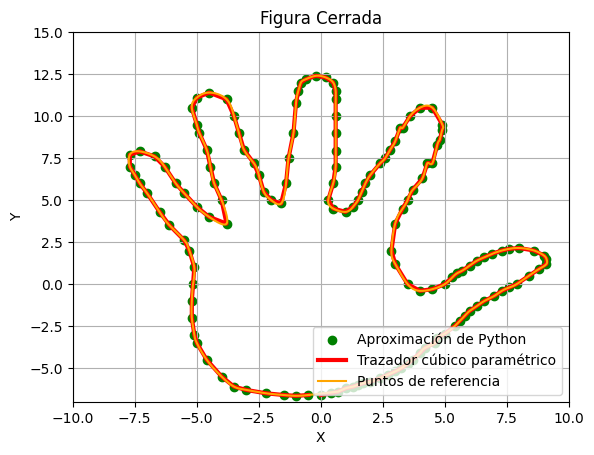

In [24]:
#Graficamos
f = plt.figure()
plt.scatter(xs, ys, color = 'green')
plt.plot(xs, ys, color = 'red',linewidth=3)
plt.plot(Tx, Ty, color = 'orange',linewidth=1.5)
plt.title('Figura Cerrada')
plt.grid(True)
plt.xlim([-10, 10])
plt.ylim([-7, 15])
plt.xlabel('X')
plt.ylabel('Y')

plt.legend(['Aproximación de Python','Trazador cúbico paramétrico', 'Puntos de referencia'], loc = 'lower right')
plt.show()